In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py # import helper functions

--2022-05-21 13:46:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-05-21 13:46:01 (90.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
!nvidia-smi

Sat May 21 13:46:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, walk_through_dir, compare_historys

In [5]:
# 2
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
unzip_data("101_food_classes_10_percent.zip")

--2022-05-21 13:48:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.20.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   259MB/s    in 6.1s    

2022-05-21 13:48:50 (256 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [6]:
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/cheesecake'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/mussels'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/risotto'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/french_fries'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/gnocchi'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/donuts'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/tuna_tartare'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/eggs_benedict'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/samosa'.
There are 0 directories and 250 images in '101_food_classes_

In [7]:
image_size = (224, 224)
batch_size = 32

train_data_10_percent_all = tf.keras.preprocessing.image_dataset_from_directory(train_dir, 
                                                                                label_mode="categorical",
                                                                                batch_size=batch_size,
                                                                                image_size=image_size)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, 
                                                                label_mode="categorical", 
                                                                batch_size=batch_size, 
                                                                image_size=image_size)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [8]:
checkpoint_path = "101_food_classes_10_percent_checkpoint_callback" # create path in directory

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                         monitor="val_accuracy", 
                                                         save_best_only=True, 
                                                         save_weights_only=True, 
                                                         save_freq="epoch")

#### Data augmentation before creating the model

In [9]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers.experimental import preprocessing

In [10]:
data_augmentation = Sequential([
                                preprocessing.RandomFlip("horizontal"),
                                preprocessing.RandomHeight(0.2),
                                preprocessing.RandomWidth(0.2), 
                                preprocessing.RandomZoom(0.2), 
                                preprocessing.RandomRotation(0.2)
])

In [11]:
train_data_10_percent_all.class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [13]:
# 1
base_model = tf.keras.applications.EfficientNetB0(include_top=False) 
base_model.trainable = False

# 2
inputs = layers.Input(shape=(224, 224, 3), name="input_shape") 
 
# 3 
x = data_augmentation(inputs) 
 
# 4
x = base_model(x, training=False) 

# 5
x = layers.GlobalAveragePooling2D(name="global_average_pooling_2d")(x) 

# 6
outputs = layers.Dense(len(train_data_10_percent_all.class_names), activation="softmax", name="output_layer")(x)

# 7
model = tf.keras.Model(inputs, outputs)

In [15]:
# 8
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [19]:
# 9
history = model.fit(train_data_10_percent_all, 
          epochs=10, 
          steps_per_epoch=len(train_data_10_percent_all), 
          validation_data=test_data, 
          validation_steps=int(0.1 * len(test_data)), 
          callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                 experiment_name="101_food_classes_10_percent"), 
                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/101_food_classes_10_percent/20220521-142257
Epoch 1/10
237/237 [==============================] - 41s 169ms/step - loss: 1.1268 - accuracy: 0.7220 - val_loss: 1.6287 - val_accuracy: 0.5597
Epoch 2/10
237/237 [==============================] - 35s 148ms/step - loss: 1.0916 - accuracy: 0.7237 - val_loss: 1.6351 - val_accuracy: 0.5613
Epoch 3/10
237/237 [==============================] - 34s 142ms/step - loss: 1.0324 - accuracy: 0.7418 - val_loss: 1.6498 - val_accuracy: 0.5534
Epoch 4/10
237/237 [==============================] - 34s 142ms/step - loss: 0.9849 - accuracy: 0.7593 - val_loss: 1.6248 - val_accuracy: 0.5633
Epoch 5/10
237/237 [==============================] - 39s 162ms/step - loss: 0.9460 - accuracy: 0.7692 - val_loss: 1.6437 - val_accuracy: 0.5629
Epoch 6/10
237/237 [==============================] - 32s 132ms/step - loss: 0.9233 - accuracy: 0.7714 - val_loss: 1.6419 - val_accuracy: 0.5625
Epoch 7/10
237/237 [===============

In [20]:
# 10
model.evaluate(test_data)

790/790 [==============================] - 56s 71ms/step - loss: 1.6413 - accuracy: 0.5680


[1.6412767171859741, 0.5680000185966492]

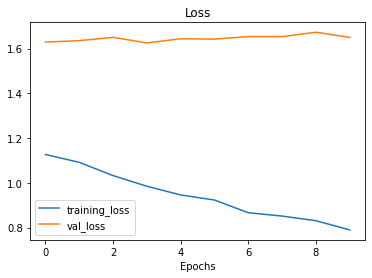

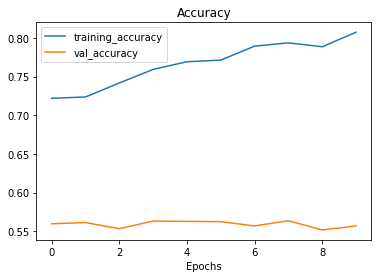

In [21]:
plot_loss_curves(history)

In [22]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_shape (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_2d (  (None, 1280)             0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
___________________________________________

In [23]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip 
unzip_data("101_food_classes_10_percent.zip")

--2022-05-21 14:30:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 142.250.99.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip.1’

101_food_classes_10 100%[===================>]   1.51G  68.6MB/s    in 18s     

2022-05-21 14:30:53 (84.1 MB/s) - ‘101_food_classes_10_percent.zip.1’ saved [1625420029/1625420029]



In [25]:
from tensorflow.keras import mixed_precision 

mixed_precision.set_global_policy("mixed_float16")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


In [26]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/cheesecake'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/mussels'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/risotto'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/french_fries'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/gnocchi'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/donuts'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/tuna_tartare'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/eggs_benedict'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/samosa'.
There are 0 directories and 250 images in '101_food_classes_

In [27]:
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

In [28]:
train_data_10_percent_all = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir, 
                                                                                label_mode="categorical", 
                                                                                batch_size=batch_size, 
                                                                                image_size=image_size) 

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir, 
                                                                label_mode="categorical", 
                                                                batch_size=batch_size, 
                                                                image_size=image_size) 

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [30]:
checkpoint_path = "101_food_classes_10_percent_checkpoint_path" 

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                         monitor="val_accuracy", 
                                                         save_best_only=True, 
                                                         save_weights_only=True, 
                                                         save_freq="epoch")

In [31]:
data_augmentation = Sequential([
                                preprocessing.RandomFlip("horizontal"), 
                                preprocessing.RandomHeight(0.2), 
                                preprocessing.RandomWidth(0.2), 
                                preprocessing.RandomZoom(0.2), 
                                preprocessing.RandomRotation(0.2)
], name="data_augmentation")

In [32]:
# 1
base_model = tf.keras.applications.EfficientNetB0(include_top=False) 
base_model.trainable = False 

# 2
inputs = layers.Input(shape=(224, 224, 3), name="input_layer") 

# 3
x = data_augmentation(inputs) 

# 4
x = base_model(x, training=False) 

# 5
x = layers.GlobalAveragePooling2D(name="global_average_pooling_2d")(x) 

# 6
outputs = layers.Dense(len(train_data_10_percent_all.class_names), name="output_layer")(x) 

# 7
new_model = tf.keras.Model(inputs, outputs)

In [33]:
# 8
new_model.compile(loss="categorical_crossentropy", 
                  optimizer=tf.keras.optimizers.Adam(), 
                  metrics=["accuracy"])

In [34]:
# 9
new_history = new_model.fit(train_data_10_percent_all, 
                            epochs=10, 
                            steps_per_epoch=len(train_data_10_percent_all), 
                            validation_data=test_data, 
                            validation_steps=int(0.1 * len(test_data)), 
                            callbacks=[checkpoint_callback])

Epoch 1/10
237/237 [==============================] - 43s 142ms/step - loss: 9.1936 - accuracy: 0.0378 - val_loss: 10.3366 - val_accuracy: 0.0680
Epoch 2/10
237/237 [==============================] - 26s 108ms/step - loss: 9.8150 - accuracy: 0.0660 - val_loss: 10.1608 - val_accuracy: 0.1021
Epoch 3/10
237/237 [==============================] - 25s 105ms/step - loss: 9.6965 - accuracy: 0.0928 - val_loss: 9.7641 - val_accuracy: 0.1179
Epoch 4/10
237/237 [==============================] - 27s 111ms/step - loss: 9.6798 - accuracy: 0.0994 - val_loss: 9.6650 - val_accuracy: 0.1294
Epoch 5/10
237/237 [==============================] - 25s 102ms/step - loss: 9.5248 - accuracy: 0.1110 - val_loss: 9.7590 - val_accuracy: 0.1297
Epoch 6/10
237/237 [==============================] - 24s 100ms/step - loss: 9.5091 - accuracy: 0.1172 - val_loss: 9.3810 - val_accuracy: 0.1396
Epoch 7/10
237/237 [==============================] - 25s 102ms/step - loss: 9.4310 - accuracy: 0.1257 - val_loss: 9.0142 - val_

In [38]:
model.evaluate(test_data) # check initial model's timing per epoch and val_accuracy score

790/790 [==============================] - 57s 71ms/step - loss: 1.6413 - accuracy: 0.5680


[1.6412771940231323, 0.5680000185966492]

In [36]:
# 10
new_model.evaluate(test_data)

790/790 [==============================] - 54s 67ms/step - loss: 9.3751 - accuracy: 0.1646


[9.37514877319336, 0.16463366150856018]

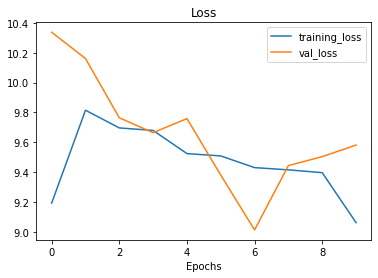

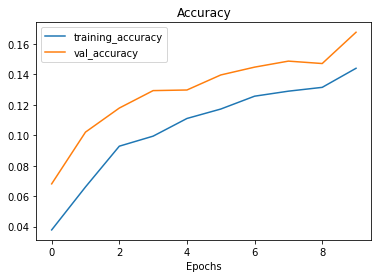

In [37]:
plot_loss_curves(new_history)

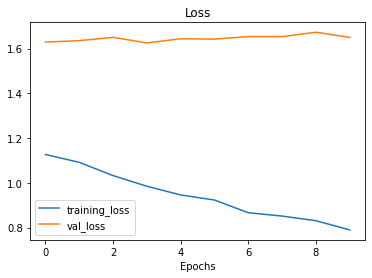

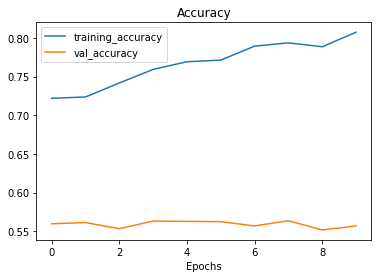

In [39]:
plot_loss_curves(history)